<a href="https://colab.research.google.com/github/Daria720/NM/blob/main/%D0%BF%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%93%D0%BE%D0%BC%D0%BE%D0%BD%D1%8E%D0%BA_%D0%94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand
from scipy.interpolate import lagrange
import sympy as sp
from math import factorial

Інтерполяційний багаточлен для всіх вузлів таблиці.

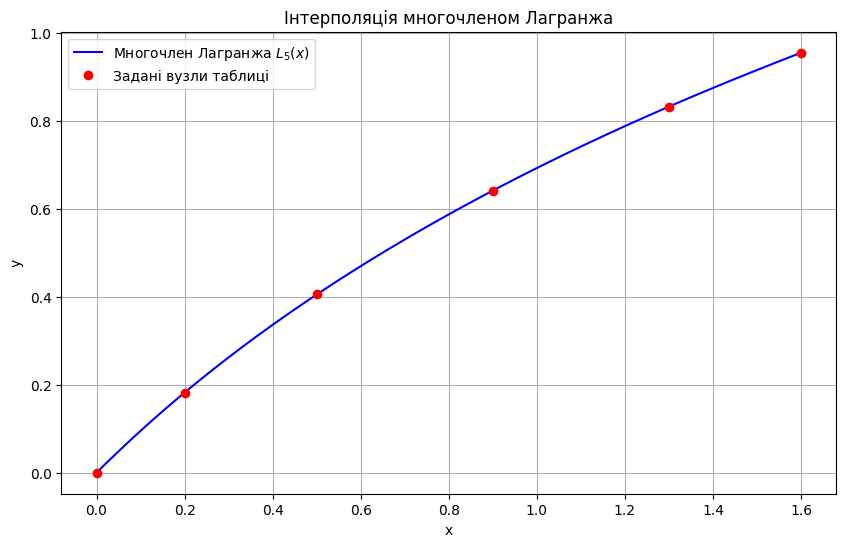


Коефіцієнти многочлена Лагранжа (від старшого до молодшого степеня):
         5           4          3         2
0.01552 x - 0.09163 x + 0.2485 x - 0.477 x + 0.9978 x


In [4]:
# Введення даних з таблиці
x_nodes = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y_nodes = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

# Побудова інтерполяційного многочлена Лагранжа

poly_lagrange = lagrange(x_nodes, y_nodes)

# Створюємо 1000 рівномірно розташованих точок x в діапазоні вузлів
x_new = np.linspace(np.min(x_nodes), np.max(x_nodes), 1000)

# Обчислюємо значення многочлена Лагранжа в цих нових точках
y_new = poly_lagrange(x_new)

# Побудова графіку
plt.figure(figsize=(10, 6))

# Графік самого многочлена Лагранжа
plt.plot(x_new, y_new, color='blue', linestyle='-', label='Многочлен Лагранжа $L_5(x)$')

# Відображення заданих вузлів таблиці (для перевірки)
plt.plot(x_nodes, y_nodes, 'ro', markersize=6, label='Задані вузли таблиці')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція многочленом Лагранжа')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Виведення коефіцієнтів многочлена (
print("\nКоефіцієнти многочлена Лагранжа (від старшого до молодшого степеня):")
# Многочлен має степінь 5, оскільки є 6 вузлів (n+1 = 6)
print(poly_lagrange)

Обчислення похідних за допомогою інтерполяційного багаточлена Ньютона

 Вхідні дані 
x_nodes = [0.  0.2 0.5 0.9 1.3 1.6]
y_nodes = [0.       0.182322 0.405465 0.641854 0.832909 0.955511]
Кількість вузлів: 6

 Таблиця розділених різниць 
x_i     f[x_i]      f[x_i, x_{i+1}]f[x_i...x_{i+2}]f[x_i...x_{i+3}]f[x_i...x_{i+4}]
---------------------------------------------------------------------------------------------------------
0.000   0.000000       0.911610       -0.335600      0.130290       -0.046607      0.015525       
0.200   0.182322       0.743810       -0.218339      0.069700       -0.021768      
0.500   0.405465       0.590973       -0.141669      0.039226       
0.900   0.641854       0.477637       -0.098520      
1.300   0.832909       0.408673       
1.600   0.955511       
---------------------------------------------------------------------------------------------------------

 Коефіцієнти многочлена Ньютона (для побудови) 
[ 0.        0.91161  -0.3356    0.13029  -0.046607  0.015525]


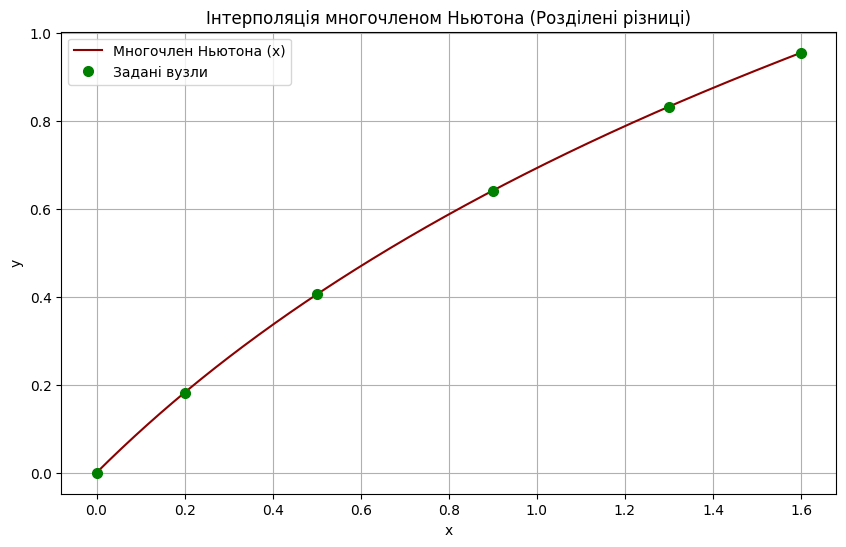

In [15]:
# Таблиця значень
x_nodes = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y_nodes = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])
n = len(x_nodes) # Кількість вузлів

print(" Вхідні дані ")
print("x_nodes =", x_nodes)
print("y_nodes =", y_nodes)
print(f"Кількість вузлів: {n}\n")

# Обчислення таблиці розділених різниць та отримання коефіцієнтів

def calculate_divided_differences_table(x, y):
    "Обчислює повну таблицю розділених різниць."
    n = len(x)
    f_table = np.zeros((n, n))
    f_table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            f_table[i, j] = (f_table[i + 1, j - 1] - f_table[i, j - 1]) / (x[i + j] - x[i])
    return f_table

# Отримуємо повну таблицю розділених різниць
full_differences_table = calculate_divided_differences_table(x_nodes, y_nodes)

# Коефіцієнти многочлена Ньютона - це перший рядок таблиці розділених різниць
coefficients = full_differences_table[0, :]

print(" Таблиця розділених різниць ")
np.set_printoptions(precision=6, suppress=True)

# Заголовки для виведення таблиці
column_titles = ["x_i", "f[x_i]", "f[x_i, x_{i+1}]", "f[x_i...x_{i+2}]", "f[x_i...x_{i+3}]", "f[x_i...x_{i+4}]", "f[x_i...x_{i+5}]"]
print(f"{column_titles[0]: <8}{column_titles[1]: <12}{column_titles[2]: <15}{column_titles[3]: <15}{column_titles[4]: <15}{column_titles[5]: <15}")
print("-" * 105)
for i in range(n):
    row = f"{x_nodes[i]: <8.3f}"
    for j in range(n - i):
        row += f"{full_differences_table[i, j]: <15.6f}"
    print(row)
print("-" * 105)

print("\n Коефіцієнти многочлена Ньютона (для побудови) ")
print(coefficients)

# Функція для обчислення значення многочлена Ньютона

def newton_divided_interpolation(x_point, x_nodes, coefficients):
    "Обчислює значення многочлена Ньютона у точці x_point."
    n = len(x_nodes)
    result = coefficients[0] # Починаємо з f[x0]

    for j in range(1, n):
        term = coefficients[j] # Коефіцієнт f[x0...xj]
        # Обчислюємо добуток (x_point - x_0)(x_point - x_1)...(x_point - x_{j-1})
        for i in range(j):
            term *= (x_point - x_nodes[i])
        result += term

    return result

#  Побудова графіку

# Створюємо багато точок для гладкої лінії многочлена
x_plot = np.linspace(np.min(x_nodes), np.max(x_nodes), 500)
y_plot = np.array([newton_divided_interpolation(x_val, x_nodes, coefficients) for x_val in x_plot])

plt.figure(figsize=(10, 6))

# Графік інтерполяційного многочлена
plt.plot(x_plot, y_plot, label='Многочлен Ньютона (x)', color='darkred', linestyle='-')

# Відображення заданих вузлів (точок)
plt.plot(x_nodes, y_nodes, 'go', markersize=7, label='Задані вузли')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція многочленом Ньютона (Розділені різниці)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Наближення функцій багаточленом Тейлора.

Функція f(x) = log(x + 1)
 Похідні 
f'(x) = 1/(x + 1)
f''(x) = -1/(x + 1)**2
f'''(x) = 2/(x + 1)**3

 Ряд Тейлора (3-й порядок) 
f(0.0) = 0
T(x) = 0.333333333333333*x**3 - 0.5*x**2 + 1.0*x


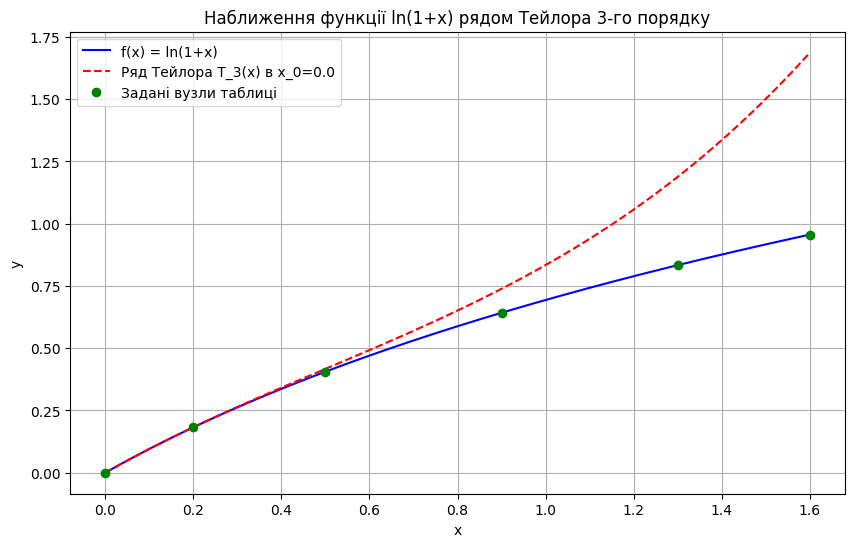

In [17]:
# Визначення функції та точки розкладу
x = sp.symbols('x')
# Аналітична функція, що відповідає таблиці
f = sp.log(1 + x)
# Точка розкладу береться з таблиці
x0 = 0.0

# Обчислення похідних
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)

print(f"Функція f(x) = {f}")
print(" Похідні ")
print("f'(x) =", f1) # 1/(1+x)
print("f''(x) =", f2) # -1/(1+x)^2
print("f'''(x) =", f3) # 2/(1+x)^3

# Обчислення значень у точці x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Побудова полінома Тейлора 3-го порядку
# T(x) = f(x0) + f'(x0)(x-x0) + (f''(x0)/2!)(x-x0)^2 + (f'''(x0)/3!)(x-x0)^3
T = (f_x0
     + f1_x0 * (x - x0)
     + (f2_x0 / factorial(2)) * (x - x0)**2
     + (f3_x0 / factorial(3)) * (x - x0)**3)

print("\n Ряд Тейлора (3-й порядок) ")
print(f"f({x0}) = {f_x0}")
print(f"T(x) = {T.expand()}") # Вивід спрощеного многочлена

#  Побудова графіків

# Область для графіку: від 0 до 1.6 (діапазон таблиці)
x_vals = np.linspace(np.min(x_nodes), np.max(x_nodes), 500)
# Конвертуємо SymPy-об'єкти у функції для швидшого обчислення NumPy
f_lambda = sp.lambdify(x, f, 'numpy')
T_lambda = sp.lambdify(x, T, 'numpy')

f_vals = f_lambda(x_vals)
T_vals = T_lambda(x_vals)

# Вузли таблиці для відображення
x_nodes = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y_nodes = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label=r'f(x) = ln(1+x)', color='blue')
plt.plot(x_vals, T_vals, label=f'Ряд Тейлора T_3(x) в x_0={x0}', color='red', linestyle='--')
plt.plot(x_nodes, y_nodes, 'go', markersize=6, label='Задані вузли таблиці')

plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Наближення функції ln(1+x) рядом Тейлора 3-го порядку")
plt.grid(True)
plt.show()

**Побудова кубічного сплайну.**

In [18]:
# Дані
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y= np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 0.0 + 0.9413(x - 0.0) + 0.0(x - 0.0)^2 + -0.7426(x - 0.0)^3, x належить [0.0, 0.2]
Відрізок 2:
S_1(x) = 0.182322 + 0.8522(x - 0.2) + -0.4455(x - 0.2)^2 + 0.2808(x - 0.2)^3, x належить [0.2, 0.5]
Відрізок 3:
S_2(x) = 0.405465 + 0.6607(x - 0.5) + -0.1929(x - 0.5)^2 + 0.0464(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 4:
S_3(x) = 0.641854 + 0.5287(x - 0.9) + -0.1371(x - 0.9)^2 + 0.0238(x - 0.9)^3, x належить [0.9, 1.3]
Відрізок 5:
S_4(x) = 0.832909 + 0.4304(x - 1.3) + -0.1086(x - 1.3)^2 + 0.1207(x - 1.3)^3, x належить [1.3, 1.6]


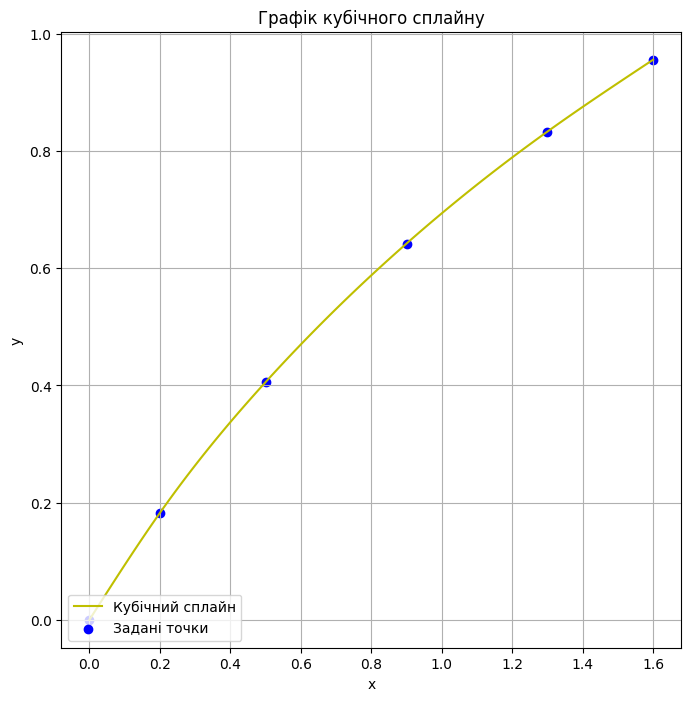

In [11]:
# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 100)  # Діапазон для побудови графіка
y_values = np.zeros_like(x_values)# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values[mask] = y_interval
# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='y')
plt.scatter(x, y, label="Задані точки", color='b')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік кубічного сплайну")
plt.legend(loc='lower left')
plt.grid()
plt.show()